In [7]:
# Load all json files in /media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

# Load all json files in /media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels
jsonPath = '/media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels'
jsonFiles = os.listdir(jsonPath)

# Print the names of the json files
print(jsonFiles)

['bdd100k_labels_images_train.json', 'bdd100k_labels_images_val.json']


In [21]:
# Make paths to the train and val json files
trainJsonPath = os.path.join(jsonPath, 'bdd100k_labels_images_train.json')
valJsonPath = os.path.join(jsonPath, 'bdd100k_labels_images_val.json')

In [9]:
# Load the json files
jsonFile = jsonFiles[0]
jsonFile = os.path.join(jsonPath, jsonFile)
with open(jsonFile) as f:
    data = json.load(f)

In [10]:
item = data[0]
print('Name:', item['name'])
print('Attributes:', item['attributes'])
print('Timestamp:', item['timestamp'])
print('Labels:', item['labels'])

Name: 0000f77c-6257be58.jpg
Attributes: {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}
Timestamp: 10000
Labels: [{'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}, 'id': 0}, {'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': True, 'trafficLightCol

In [11]:
# See contents of labels in a pretty format
label_item = item['labels'][0]
print(label_item.keys())

dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id'])


In [12]:
# How many items are there in the json file?
print(len(data))

69863


In [13]:
weather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in weather:
        weather[condition] += 1
    else:
        weather[condition] = 1
print(weather)

{'clear': 37344, 'rainy': 5070, 'undefined': 8119, 'snowy': 5549, 'overcast': 8770, 'partly cloudy': 4881, 'foggy': 130}


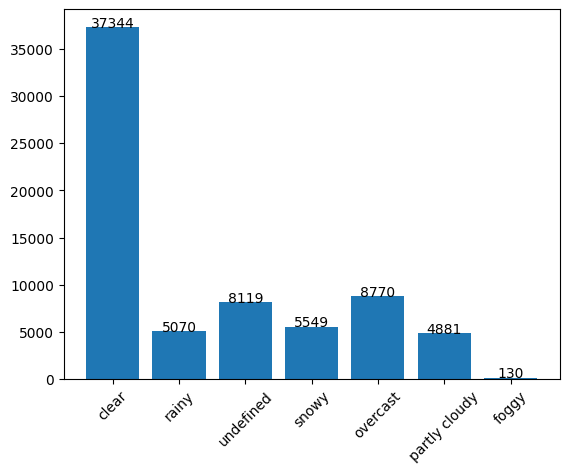

In [14]:
# Make a bar graph of the weather conditions
plt.bar(weather.keys(), weather.values())

# Add the values to the bar graph
for key, value in weather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)
plt.show()


In [15]:
scene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in scene:
        scene[condition] += 1
    else:
        scene[condition] = 1
print(scene)

{'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27}


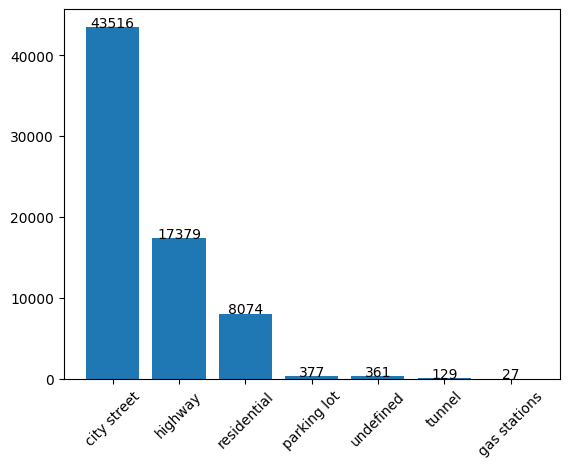

In [16]:
# Make a bar graph of the weather conditions
plt.bar(scene.keys(), scene.values())

# Add the values to the bar graph
for key, value in scene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [17]:
import os

# The path to the entire dataset that has train, val and test folders
imagePath = '/media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_images_100k/bdd100k/images/100k'

# The path to the train folder
trainPath = os.path.join(imagePath, 'train')

# The path to the val folder
valPath = os.path.join(imagePath, 'val')

# The path to the test folder
testPath = os.path.join(imagePath, 'test')

In [18]:
# Count number of images in train, val and test folders
trainImages = os.listdir(trainPath)
valImages = os.listdir(valPath)
testImages = os.listdir(testPath)

print('Number of images in train folder:', len(trainImages))
print('Number of images in val folder:', len(valImages))
print('Number of images in test folder:', len(testImages))

Number of images in train folder: 70000
Number of images in val folder: 10000
Number of images in test folder: 20000


{'clear': 37344, 'rainy': 5070, 'undefined': 8119, 'snowy': 5549, 'overcast': 8770, 'partly cloudy': 4881, 'foggy': 130}


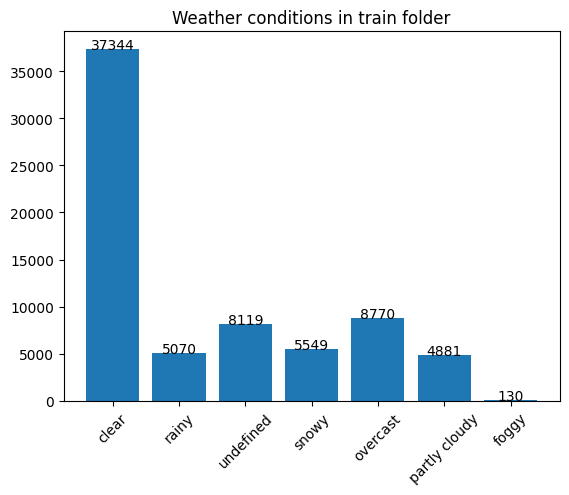

In [24]:
# Count number of images of each weather condition in train folder (trainImages)
# Note: The condition is in the json file at trainJsonPath

with open(trainJsonPath, 'r') as f:
    data = json.load(f)

trainWeather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in trainWeather:
        trainWeather[condition] += 1
    else:
        trainWeather[condition] = 1

print(trainWeather)

# Make a bar graph of the weather conditions
plt.bar(trainWeather.keys(), trainWeather.values())

# Add the values to the bar graph
for key, value in trainWeather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Weather conditions in train folder')
plt.show()

{'overcast': 1239, 'clear': 5346, 'undefined': 1157, 'rainy': 738, 'snowy': 769, 'partly cloudy': 738, 'foggy': 13}


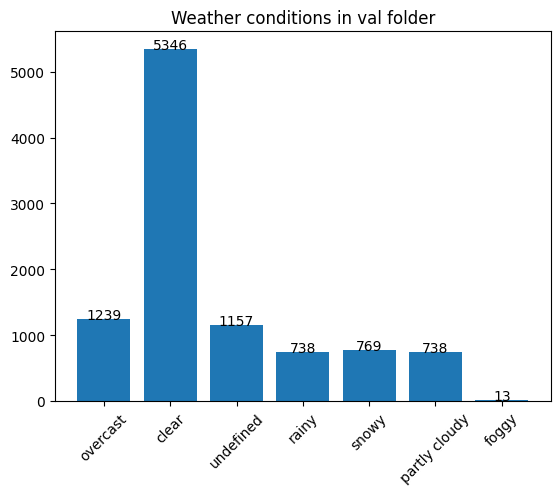

In [25]:
# Count number of images of each weather condition in val folder (trainImages)
# Note: The condition is in the json file at jsonPathVal

with open(valJsonPath, 'r') as f:
    data = json.load(f)

valWeather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in valWeather:
        valWeather[condition] += 1
    else:
        valWeather[condition] = 1

print(valWeather)

# Make a bar graph of the weather conditions
plt.bar(valWeather.keys(), valWeather.values())

# Add the values to the bar graph
for key, value in valWeather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Weather conditions in val folder')
plt.show()   


{'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27}


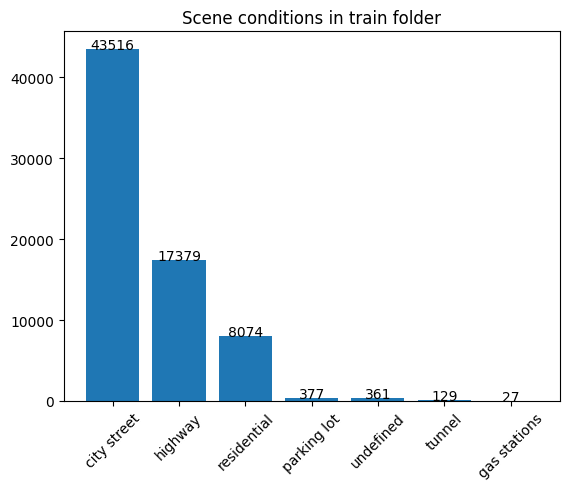

In [26]:
# Count number of images of each scene in train folder (trainImages)
# Note: The scene is in the json file at trainJsonPath

with open(trainJsonPath, 'r') as f:
    data = json.load(f)

trainScene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in trainScene:
        trainScene[condition] += 1
    else:
        trainScene[condition] = 1

print(trainScene)

# Make a bar graph of the scene conditions
plt.bar(trainScene.keys(), trainScene.values())

# Add the values to the bar graph
for key, value in trainScene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Scene conditions in train folder')
plt.show()

{'city street': 6112, 'highway': 2499, 'tunnel': 27, 'residential': 1253, 'parking lot': 49, 'gas stations': 7, 'undefined': 53}


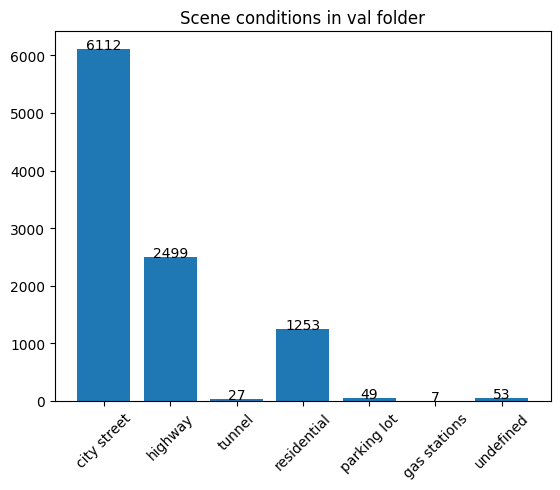

In [27]:
# Count number of images of each scene in val folder (valImages)
# Note: The scene is in the json file at valJsonPath

with open(valJsonPath, 'r') as f:
    data = json.load(f)

valScene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in valScene:
        valScene[condition] += 1
    else:
        valScene[condition] = 1

print(valScene)

# Make a bar graph of the scene conditions
plt.bar(valScene.keys(), valScene.values())

# Add the values to the bar graph
for key, value in valScene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Scene conditions in val folder')
plt.show()